In [1]:
#Dependences 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Take in all of our CitiBike data and read it into pandas
jan_2019 = "../Resources/JC-201901-citibike-tripdata 4 2.csv"
feb_2019 = "../Resources/JC-201902-citibike-tripdata.csv"
mar_2019 = "../Resources/JC-201903-citibike-tripdata.csv"
apr_2019 = "../Resources/JC-201904-citibike-tripdata.csv"
may_2019 = "../Resources/JC-201905-citibike-tripdata.csv"
june_2019 = "../Resources/JC-201906-citibike-tripdata.csv"
july_2019 = "../Resources/JC-201907-citibike-tripdata.csv"
aug_2019 = "../Resources/JC-201908-citibike-tripdata 2.csv"

#Create DataFrames for all the data files
jan_2019_df = pd.read_csv(jan_2019)
feb_2019_df = pd.read_csv(feb_2019)
mar_2019_df = pd.read_csv(mar_2019)
apr_2019_df = pd.read_csv(apr_2019)
may_2019_df = pd.read_csv(may_2019)
june_2019_df = pd.read_csv(june_2019)
july_2019_df = pd.read_csv(july_2019)
aug_2019_df = pd.read_csv(aug_2019)

In [3]:
#Merge all data from 2019 into one big data frame 
combined2019_CitiBike_df = pd.merge(jan_2019_df, feb_2019_df, how='outer')
combined2019_CitiBike_df3 = pd.merge(combined2019_CitiBike_df,mar_2019_df, how = "outer")
combined2019_CitiBike_df4 = pd.merge(combined2019_CitiBike_df3,apr_2019_df, how = "outer")
combined2019_CitiBike_df5 = pd.merge(combined2019_CitiBike_df4,may_2019_df, how = "outer")
combined2019_CitiBike_df6 = pd.merge(combined2019_CitiBike_df5,june_2019_df, how = "outer")
combined2019_CitiBike_df7 = pd.merge(combined2019_CitiBike_df6,july_2019_df, how = "outer")
combined2019_CitiBike_df8 = pd.merge(combined2019_CitiBike_df7,aug_2019_df, how = "outer")

combined2019_CitiBike_df8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [4]:
#Changing gender column to male, female, and unknown vs 0,1,2 
combined2019_CitiBike_df8["gender"] = combined2019_CitiBike_df8["gender"].map(str)
combined2019_CitiBike_df8["gender"] = combined2019_CitiBike_df8["gender"].replace(['0','1','2'],['Unknown','Male','Female'])
combined2019_CitiBike_df8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,Male
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,Female
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,Male
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,Unknown
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,Unknown


In [5]:
#splitting start time column 
combined2019_CitiBike_df8['starttime'] = pd.to_datetime(combined2019_CitiBike_df8['starttime'])
combined2019_CitiBike_df8['start date'] = combined2019_CitiBike_df8['starttime'].dt.date
combined2019_CitiBike_df8['start time'] = combined2019_CitiBike_df8['starttime'].dt.time
combined2019_CitiBike_df8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start date,start time
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,Male,2019-01-01,03:09:09.711000
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,Female,2019-01-01,05:18:00.106000
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,Male,2019-01-01,10:36:33.340000
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,Unknown,2019-01-01,12:43:38.643000
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,Unknown,2019-01-01,12:43:39.601000


In [6]:
#splitting end time time column 
combined2019_CitiBike_df8['stoptime'] = pd.to_datetime(combined2019_CitiBike_df8['stoptime'])
combined2019_CitiBike_df8['end date'] = combined2019_CitiBike_df8['stoptime'].dt.date
combined2019_CitiBike_df8['end time'] = combined2019_CitiBike_df8['stoptime'].dt.time
combined2019_CitiBike_df8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start date,start time,end date,end time
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,Male,2019-01-01,03:09:09.711000,2019-01-01,03:12:30.879000
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,Female,2019-01-01,05:18:00.106000,2019-01-01,05:26:25.905000
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,Male,2019-01-01,10:36:33.340000,2019-01-01,10:49:10.260000
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,Unknown,2019-01-01,12:43:38.643000,2019-01-01,13:09:54.528000
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,Unknown,2019-01-01,12:43:39.601000,2019-01-01,13:09:46.510000


In [7]:
# Display the total number of rides for 2020
total_rides2019 = len(combined2019_CitiBike_df8["tripduration"])
total_rides2019
print(f"There were a total of {total_rides2019} between January 1, 2019 through August 31,2019")

There were a total of 262925 between January 1, 2019 through August 31,2019


In [7]:
# Number of rides broken down by month 
jancount2019 = len(jan_2019_df["tripduration"])
jancount2019
print(f"There were a total of {jancount2019} between January 1, 2019 through January 31,2019")
febcount2019 =len(feb_2019_df["tripduration"])
febcount2019
print(f"There were a total of {febcount2019} between Febuary 1, 2019 through Febuary 29,2019")
marcount2019= len(mar_2019_df["tripduration"])
marcount2019
print(f"There were a total of {marcount2019} between March 1, 2019 through March 31,2019")
aprcount2019 = len(apr_2019_df["tripduration"])
aprcount2019
print(f"There were a total of {aprcount2019} between April 1, 2019 through April 30,2019")
maycount2019 = len(may_2019_df["tripduration"])
maycount2019
print(f"There were a total of {maycount2019} between May 1, 2019 through May 31,2019")
juncount2019 = len(june_2019_df["tripduration"])
juncount2019
print(f"There were a total of {juncount2019} between June 1, 2019 through June 30,2019")
julcount2019 = len(july_2019_df["tripduration"])
julcount2019
print(f"There were a total of {julcount2019} between July 1, 2019 through July 31,2019")
augcount2019 = len(aug_2019_df["tripduration"])
augcount2019
print(f"There were a total of {augcount2019} between August 1, 2019 through August 31,2019")

#Create a dictionary for the months and ride count 
months = {"Months": ["January","February","March","April","May","June","July","August"],
          "Count" : [jancount2019 , febcount2019, marcount2019, aprcount2019, maycount2019,
                     juncount2019, julcount2019, augcount2019]}

#Turn the months dictionary into a dataframe
total_rides2019 = pd.DataFrame(months, columns = ["Months", "Count"])
total_rides2019

There were a total of 19676 between January 1, 2019 through January 31,2019
There were a total of 18565 between Febuary 1, 2019 through Febuary 29,2019
There were a total of 23606 between March 1, 2019 through March 31,2019
There were a total of 33056 between April 1, 2019 through April 30,2019
There were a total of 36135 between May 1, 2019 through May 31,2019
There were a total of 39430 between June 1, 2019 through June 30,2019
There were a total of 43746 between July 1, 2019 through July 31,2019
There were a total of 48711 between August 1, 2019 through August 31,2019


,Months,Count
0,January,19676
1,February,18565
2,March,23606
3,April,33056
4,May,36135
5,June,39430
6,July,43746
7,August,48711


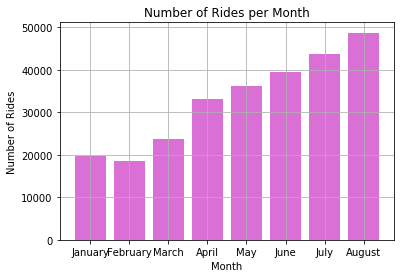

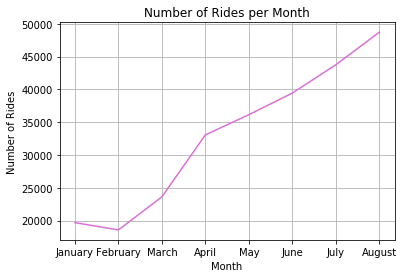

In [8]:
#Turn the total rides data frame into a line graph
x_axis = total_rides2019["Months"]
y_axis = total_rides2019["Count"]
plt.bar(x_axis, y_axis, color = "orchid")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Month")
plt.grid()
plt.savefig("../Images/total_rides2019_Bar")
plt.show()
plt.plot(x_axis, y_axis, color = "orchid")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Month")
plt.grid()
plt.savefig("../Images/total_rides2019_line")
plt.show()


In [9]:
jancount2019 = len(jan_2019_df["tripduration"])
jantripduration2019 = jan_2019_df["tripduration"].sum()
jantripdurationinmin2019 = jantripduration2019/60
janaveragetripduration2019 = jantripduration2019/jancount2019
janaveragetripduration2019
janminutes = janaveragetripduration2019/60
jan_minutes = janminutes.round(2)
print(f"The average trip duration for January 2019 was {jan_minutes}")
febcount2019 = len(feb_2019_df["tripduration"])
febtripduration2019 = feb_2019_df["tripduration"].sum()
febaveragetripduration2019 = febtripduration2019/febcount2019
febaveragetripduration2019
febminutes = febaveragetripduration2019/60
feb_minutes = febminutes.round(2)
print(f"The average trip duration for Febuary 2019 was {feb_minutes}")
marcount2019 = len(mar_2019_df["tripduration"])
martripduration2019 = mar_2019_df["tripduration"].sum()
maraveragetripduration2019 = martripduration2019/marcount2019
maraveragetripduration2019
marminutes = maraveragetripduration2019/60
mar_minutes = marminutes.round(2)
print(f"The average trip duration for March 2019 was {mar_minutes}")
aprcount2019 = len(apr_2019_df["tripduration"])
aprtripduration2019 = apr_2019_df["tripduration"].sum()
apraveragetripduration2019 = aprtripduration2019/aprcount2019
apraveragetripduration2019
aprminutes = apraveragetripduration2019/60
apr_minutes = aprminutes.round(2)
print(f"The average trip duration for April 2019 was {apr_minutes}")
maycount2019 = len(may_2019_df["tripduration"])
maytripduration2019 = may_2019_df["tripduration"].sum()
mayaveragetripduration2019 = maytripduration2019/maycount2019
mayaveragetripduration2019
mayminutes = mayaveragetripduration2019/60
may_minutes = mayminutes.round(2)
print(f"The average trip duration for May 2019 was {may_minutes}")
juncount2019 = len(june_2019_df["tripduration"])
juntripduration2019 = june_2019_df["tripduration"].sum()
junaveragetripduration2019 = juntripduration2019/juncount2019
junaveragetripduration2019
junminutes = junaveragetripduration2019/60
jun_minutes = junminutes.round(2)
print(f"The average trip duration for June 2019 was {jun_minutes}")
julcount2019 = len(july_2019_df["tripduration"])
jultripduration2019 = july_2019_df["tripduration"].sum()
julaveragetripduration2019 = jultripduration2019/julcount2019
julaveragetripduration2019
julminutes = julaveragetripduration2019/60
jul_minutes = julminutes.round(2)
print(f"The average trip duration for July 2019 was {jul_minutes}")
augcount2019 = len(aug_2019_df["tripduration"])
augtripduration2019 = aug_2019_df["tripduration"].sum()
augaveragetripduration2019 = augtripduration2019/augcount2019
augaveragetripduration2019
augminutes = augaveragetripduration2019/60
aug_minutes = augminutes.round(2)
print(f"The average trip duration for August 2019 was {aug_minutes}")

#Create a dictionary for the months and ride count 
months = {"Months": ["January","February","March","April","May","June","July","August"],
          "Minutes" : [jan_minutes , feb_minutes, mar_minutes, apr_minutes, may_minutes, jun_minutes, jul_minutes, aug_minutes]}
#Turn the months dictionary into a dataframe
average_duration2019 = pd.DataFrame(months, columns = ["Months", "Minutes"])
average_duration2019.round(2)

The average trip duration for January 2019 was 7.45
The average trip duration for Febuary 2019 was 10.09
The average trip duration for March 2019 was 9.1
The average trip duration for April 2019 was 11.9
The average trip duration for May 2019 was 13.74
The average trip duration for June 2019 was 16.23
The average trip duration for July 2019 was 13.54
The average trip duration for August 2019 was 13.05


,Months,Minutes
0,January,7.45
1,February,10.09
2,March,9.10
3,April,11.90
4,May,13.74
5,June,16.23
6,July,13.54
7,August,13.05


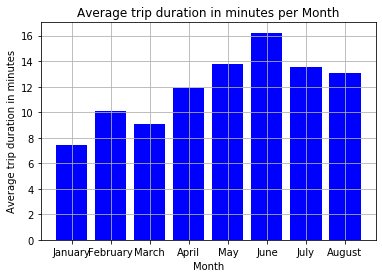

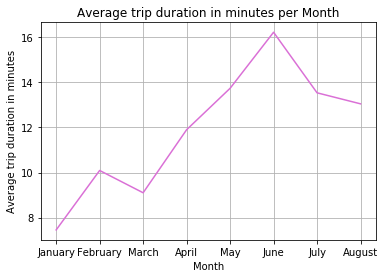

In [10]:
# plot a bar chart for Average trip duration in minutes
#Set the x and y axis
x_axis = average_duration2019["Months"]
y_axis = average_duration2019["Minutes"]
#Create the bar chart
plt.bar(x_axis, y_axis, color = "blue")
#Set the labels and title
plt.title("Average trip duration in minutes per Month")
plt.xlabel("Month")
plt.ylabel("Average trip duration in minutes")
plt.grid()
plt.savefig("../Images/avg_trip2019_bar")
plt.show()
# plot a line graph for Average trip duration in minutes
x_axis = average_duration2019["Months"]
y_axis = average_duration2019["Minutes"]
plt.plot(x_axis, y_axis, color = "orchid")
plt.xlabel("Month")
plt.ylabel("Average trip duration in minutes")
plt.title("Average trip duration in minutes per Month")
plt.grid()
plt.savefig("../Images/avg_trip2019_line")
plt.show()

In [11]:
# Count of subscriber vs. customer 
user_type = combined2019_CitiBike_df8["usertype"].value_counts()
user_type

Subscriber    234973
Customer       27952
Name: usertype, dtype: int64

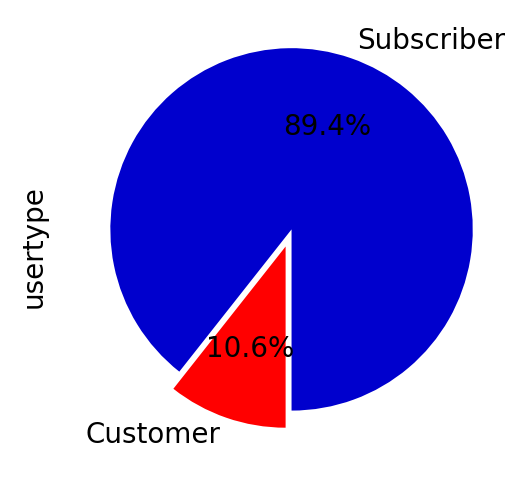

In [12]:
explode = (0.1, 0)
colors = ["mediumblue", "red"]
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
combined2019_CitiBike_df8['usertype'].value_counts().plot(kind='pie', explode = explode, colors = colors,
                                                          ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)
plt.savefig("../Images/sub2019_pie")

In [13]:
# Count of male, female, and unknown 
gender_type = combined2019_CitiBike_df8["gender"].value_counts()
gender_type

Male       187576
Female      57495
Unknown     17854
Name: gender, dtype: int64

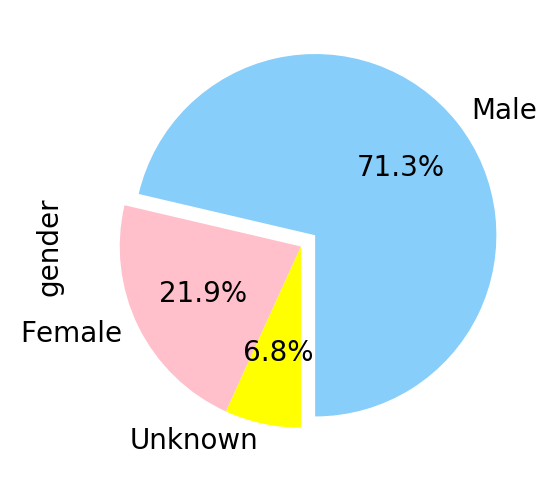

In [14]:
# Create a pie chart based upon use of service by gender
explode = (0.1, 0, 0 )
colors = ["lightskyblue", "pink", "yellow"]
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
combined2019_CitiBike_df8['gender'].value_counts().plot(kind='pie', explode = explode, colors = colors,
                                                          ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)
plt.savefig("../Images/gender2019_pie")

In [15]:
# Create bins in which to place values based upon birth year
bins = [1900, 1946, 1964, 1979, 1994, 2015]
# Create labels for these bins
bin_labels = ["1900-1945", "1946-1964", "1965-1979", "1980-1994", "1995-2015"]

#Create a new column for which been each row falls into
combined2019_CitiBike_df8["binned"] = pd.cut(combined2019_CitiBike_df8["birth year"], bins)

#Get the value count for each bin group
bin_count = pd.cut(combined2019_CitiBike_df8["birth year"], bins=bins).value_counts()

#Group by the binned column 
bin_group = combined2019_CitiBike_df8.groupby("binned")

#Print the number of values in each bin group 
print(bin_group["birth year"].count())

binned
(1900, 1946]       134
(1946, 1964]     19405
(1964, 1979]     71396
(1979, 1994]    161815
(1994, 2015]     10079
Name: birth year, dtype: int64


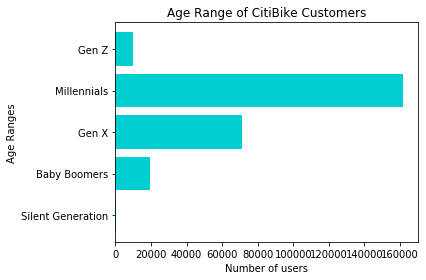

In [16]:
#Set the x and y axis
x_axis = bin_labels 
y = bin_group["birth year"].count()
#Create the bar chart 
#fig = plt.figure(figsize=(4,3), dpi=150)
plt.barh(x_axis, y, color = "darkturquoise")

#Set the labels and title
plt.title("Age Range of CitiBike Customers")
plt.xlabel("Number of users")
plt.ylabel("Age Ranges")
#Create tick values 
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, ["Silent Generation", "Baby Boomers", "Gen X", "Millennials", "Gen Z"])
plt.tight_layout()
plt.savefig("../Images/age2019_bar")
plt.show()

In [17]:
# Groupby start stations
startstation = combined2019_CitiBike_df8.groupby(["start station name"])
startstationcount = startstation["start station name"].count()
#create new DataFrame
top5_start_stations = pd.DataFrame({"start station count" : startstationcount})
#Sort the start station count column in descending order
top5_start_stations = top5_start_stations.sort_values(["start station count"], ascending = [False])
top5_start_stations.head()

,start station count
start station name,
Grove St PATH,30860
Hamilton Park,15181
Sip Ave,12214
Harborside,11350
Newport PATH,11268


In [18]:
# Groupby end stations
endstation = combined2019_CitiBike_df8.groupby(["end station name"])
endstationcount = endstation["end station name"].count()
#create new DataFrame
top5_end_stations = pd.DataFrame({"end station count": endstationcount})
#Sort the start station count column in descending order
top5_end_stations = top5_end_stations.sort_values(["end station count"], ascending = [False])
top5_end_stations.head()

,end station count
end station name,
Grove St PATH,37286
Hamilton Park,14313
Sip Ave,11524
Newport PATH,11473
Harborside,11342


In [19]:
#Find which bikes were used the most 
#First you change the datatype of bikeid to string
combined2019_CitiBike_df8["bikeid"] = combined2019_CitiBike_df8["bikeid"].astype("str")
combined2019_CitiBike_df8.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                             object
usertype                           object
birth year                          int64
gender                             object
start date                         object
start time                         object
end date                           object
end time                           object
binned                           category
dtype: object

In [20]:
#Group by bike ID
bike_id = combined2019_CitiBike_df8.groupby(["bikeid"])
bikecount = bike_id["bikeid"].count()

#create new DataFrame
top5_bikes = pd.DataFrame({"bike id count": bikecount})
top5_bikes = top5_bikes.sort_values(["bike id count"], ascending = [False])
top5_bikes = top5_bikes.reset_index()
top5_bikes.head()

,bikeid,bike id count
0,26159,770
1,29242,751
2,29535,746
3,26275,737
4,29671,734


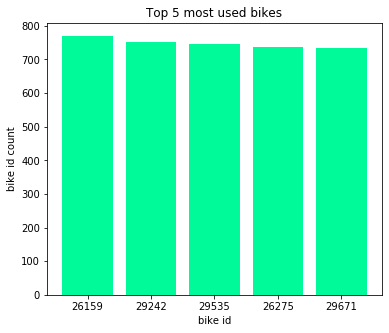

In [21]:
#Create a bar graph to show the top 5 used bikes in 2020
x_axis = top5_bikes["bikeid"].head()
y_axis = top5_bikes["bike id count"].head()
plt.figure(figsize=(6,5))
plt.bar(x_axis, y_axis, color = "mediumspringgreen")
plt.xlabel("bike id")
plt.ylabel("bike id count")
plt.title("Top 5 most used bikes")
plt.savefig("../Images/topbike2019_bar")
plt.show()

In [22]:
#Find the most popular routes 
most_popular_routes_df = combined2019_CitiBike_df8.groupby(["start station name",
                                                            "end station name"])\
                                                            .size().reset_index(name = "Number of Trips")
most_popular_routes_df = most_popular_routes_df.sort_values(["Number of Trips"], ascending = False)
most_popular_routes_df.head()

,start station name,end station name,Number of Trips
992,Hamilton Park,Grove St PATH,5407
939,Grove St PATH,Hamilton Park,4035
224,Brunswick & 6th,Grove St PATH,3268
1404,Jersey & 6th St,Grove St PATH,2925
274,Brunswick St,Grove St PATH,2840


In [23]:
most_popular_routes_df["Popular Routes"] = most_popular_routes_df["start station name"].str.cat(most_popular_routes_df["end station name"],sep= " to ")
most_popular_routes_df.head()

,start station name,end station name,Number of Trips,Popular Routes
992,Hamilton Park,Grove St PATH,5407,Hamilton Park to Grove St PATH
939,Grove St PATH,Hamilton Park,4035,Grove St PATH to Hamilton Park
224,Brunswick & 6th,Grove St PATH,3268,Brunswick & 6th to Grove St PATH
1404,Jersey & 6th St,Grove St PATH,2925,Jersey & 6th St to Grove St PATH
274,Brunswick St,Grove St PATH,2840,Brunswick St to Grove St PATH


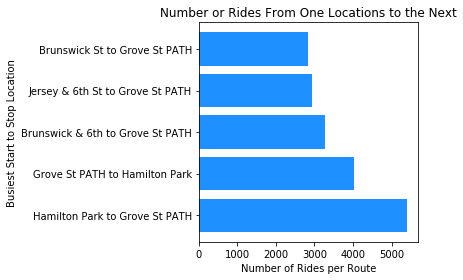

In [24]:
#Set up bar chart for most popular routes
routes_x_axis = most_popular_routes_df["Popular Routes"].head()
routes_y_axis = most_popular_routes_df["Number of Trips"].head()

plt.barh(routes_x_axis, routes_y_axis, color = "dodgerblue")
plt.title("Number or Rides From One Locations to the Next")
plt.xlabel("Number of Rides per Route")
plt.ylabel("Busiest Start to Stop Location")
plt.tight_layout()
plt.savefig("../Images/rides2019_bar")
plt.show()

In [25]:
#Drop pins on the most popular start and stop locations 
import gmaps
from config import g_key

location_df = combined2019_CitiBike_df8[["start station name", "start station latitude",
                                         "start station longitude", "end station id", "end station name", 
                                         "end station latitude","end station longitude"]]

location_df.head()

,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486
1,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483
2,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701
3,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483
4,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483


In [26]:
#Group the functions
pop_locations = location_df.groupby(["start station name", "start station latitude", "start station longitude",
                                     "end station name", "end station latitude", "end station longitude"])\
                                        .size().reset_index(name = "Number of Trips")
pop_locations= pop_locations.sort_values(["Number of Trips"], ascending = False)
pop_locations.head()

,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,Number of Trips
1006,Hamilton Park,40.727596,-74.044247,Grove St PATH,40.719586,-74.043117,5407
952,Grove St PATH,40.719586,-74.043117,Hamilton Park,40.727596,-74.044247,4035
228,Brunswick & 6th,40.726012,-74.050389,Grove St PATH,40.719586,-74.043117,3268
1421,Jersey & 6th St,40.725289,-74.045572,Grove St PATH,40.719586,-74.043117,2925
279,Brunswick St,40.724176,-74.050656,Grove St PATH,40.719586,-74.043117,2840


In [27]:
#Set up varibales to for map 
start_locations = pop_locations[["start station latitude", "start station longitude"]].astype(float)
end_locations = pop_locations[["end station latitude", "end station longitude"]].astype(float)

In [28]:
#Create the marker layer map 
fig = gmaps.figure(center=(48.0, 0.0), zoom_level=2)

start_marker_layer =  gmaps.marker_layer(start_locations.head(), hover_text='', label='')

fig.add_layer(start_marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
##Create the heat layer map 
fig = gmaps.figure(center=(48.0, 0.0), zoom_level=2)

end_marker_layer =  gmaps.marker_layer(end_locations.head(), hover_text='', label='')

fig.add_layer(end_marker_layer)

fig


Figure(layout=FigureLayout(height='420px'))